# Example 2D, 1 class

In [6]:
# Import packages
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.datasets import make_classification

from Bias import bias_rotate_2D, BIASme
from Transformations import remove_outliers_lof, trafo_keep_axes
from full.DensityEstimators import DE_kde
from IMITATE import IMITATE

In [2]:
def generateData_pill(dataset_size):
    data, labels = make_classification(
        n_samples=max(10000, dataset_size),
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=1,
        n_clusters_per_class=1,
        flip_y=0,  # noise
        random_state=2210)
    data = np.array(data[0:dataset_size, (0, 1)])        # cut away dummy dimension
    labels = np.array([0] * dataset_size)
    return data, labels

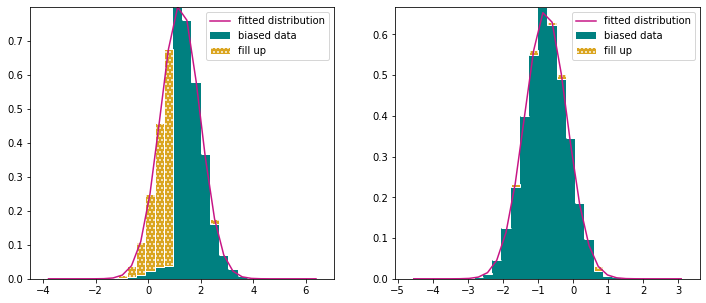

[1.1004478322775753]

In [12]:
bias_gen = lambda a, b: bias_rotate_2D(training=a, labels=b, alpha=0.5*np.pi, biasedClass=0)
data_gen = generateData_pill
DE = lambda b: DE_kde(num_bins=b, kernel='gau')
bh = IMITATE([15], bias_gen, data_gen, repeat=1, DE=DE, trafo=trafo_keep_axes)
bh.fill_up(30, iterations=1, fill_up_plots=True, point_plots=False, RO=True)

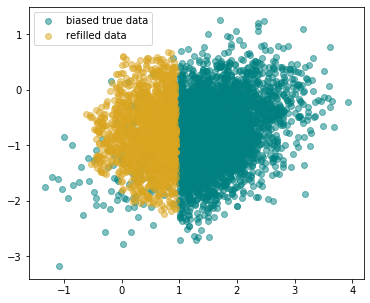

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
ax.scatter(bh.D.X_b_train[:,0], bh.D.X_b_train[:,1], c='teal', alpha=0.5, label="biased true data")
ax.scatter(bh.added_points[:,0], bh.added_points[:,1], c='goldenrod', alpha=0.5, label="refilled data")
plt.legend()
plt.show()
fig.savefig('Results/Example_output.pdf', format='pdf', dpi=1200, bbox_inches='tight')